In [1]:
#something need to import here:
import os,sys,json
from typing import List,Optional
import matplotlib.pyplot as plt
import numpy as np
config={
    "method":"MEMIT",
    "model":"gpt2-xl"
        }
os.chdir(f"/root/EasyEdit/results/{config['method']}/{config['model']}")


In [2]:
# all function here:
def load_json(file_path):
    with open(file_path,"r") as f:
        data = json.load(f)
    return data

def get_avg_metrics(data:Optional[List],
                    name
                    ):
    scores = []
    for run in data:
        scores.append(run[name][0])
    scores = np.array(scores)
    return np.mean(scores)

def get_avg_json(data: Optional[List]):
    metricsname = ["S", "ES", "PS", "NS", "EA", "PA", "NA", "GE", "RS"]
    metrics = {
        "S": get_avg_metrics(data=data, name="post_score"),
        "ES": get_avg_metrics(data=data, name="post_rewrite_success"),
        "PS": get_avg_metrics(data=data, name="post_paraphrase_success"),
        "NS": get_avg_metrics(data=data, name="post_neighborhood_success"),
        "EA": get_avg_metrics(data=data, name="post_rewrite_acc"),
        "PA": get_avg_metrics(data=data, name="post_paraphrase_acc"),
        "NA": get_avg_metrics(data=data, name="post_neighborhood_acc"),
        "GE": get_avg_metrics(data=data, name="post_ngram_entropy"),
        "RS": get_avg_metrics(data=data, name="post_reference_score")
    }
    return metrics
def get_star_edit_json(data: Optional[List]):
    metricsname = ["S", "ES", "PS", "NS", "EA", "PA", "NA", "GE", "RS"]
    metrics = {
        "ES": get_avg_metrics(data=data, name="post_rewrite_success"),
        "EA": get_avg_metrics(data=data, name="post_rewrite_acc"),
    }
    return metrics

def plot_star_chart(data,Method,Model,EPOCH):
    # 提取 ES 和 EA 数据
    es_values = [item['ES'] for item in data]
    ea_values = [item['EA'] for item in data]
    
    # 定义柱的宽度
    bar_width = 0.35

    # 定义柱的位置
    r1 = range(len(es_values))
    r2 = [x + bar_width for x in r1]

    # 绘制柱状图
    plt.figure(figsize=(10, 6))
    plt.bar(r1, es_values, color='#1f77b4', width=bar_width, label='ES')
    plt.bar(r2, ea_values, color='#ff7f0e', width=bar_width, label='EA')

    # 添加标题和标签
    plt.xlabel(f'StarEdit Num EPOCH={EPOCH} ', fontweight='bold')
    plt.ylabel('Value [0-100]', fontweight='bold')
    plt.title(f'Apply {Method} by avgloss in {Model}  Chart of ES and EA Values')

    # 添加 x 轴刻度标签
    plt.xticks([r + bar_width / 2 for r in range(len(es_values))], range(1, len(es_values) + 1))

    # 添加图例
    plt.legend()

    # 显示数值
    for i in range(len(r1)):
        plt.text(r1[i], es_values[i] + 1, f'{es_values[i]:.1f}', ha='center', va='bottom')
        plt.text(r2[i], ea_values[i] + 1, f'{ea_values[i]:.1f}', ha='center', va='bottom')

    # 显示图表
    plt.show()
def plot_chart(tasks, consist, unconsist,name,save_path,m_name):
    x = np.arange(len(tasks))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, consist, width, label='consist', color='lightseagreen')
    rects2 = ax.bar(x + width/2, unconsist, width, label='unconsist', color='salmon')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Tasks')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Performance for consist and unconsist! \nEdited Model:{m_name}   method:{name}')
    ax.set_xticks(x)
    ax.set_xticklabels(tasks)
    ax.legend()

    # Adding labels
    def autolabel(rects, position='outside'):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            if position == 'inside':
                ax.annotate(f'{height:.1f}',
                            xy=(rect.get_x() + rect.get_width() / 2, height / 2),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom',
                            fontsize=8, color='black')  # 调整字体大小和颜色
            else:
                ax.annotate(f'{height:.1f}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom',
                            fontsize=8)  # 调整字体大小

    autolabel(rects1, position='outside')
    autolabel(rects2, position='inside')

    fig.tight_layout()
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    
# 示例数据
# indicator = ["S", "ES", "PS", "NS", "EA", "PA", "NA", "GE", "RS"]
# original = [metrics["S"], metrics["ES"],metrics["PS"],metrics["NS"],metrics["EA"],metrics["PA"],metrics["NA"],metrics["GE"],metrics["RS"]]
# edited_average = [metrics_o["S"], metrics_o["ES"],metrics_o["PS"],metrics_o["NS"],metrics_o["EA"],metrics_o["PA"],metrics_o["NA"],metrics_o["GE"],metrics_o["RS"]]

def get_N_metrics(files):
    metrics = []

    for file in files:
        data_js = load_json(file)
        metrics_js = get_avg_json(data=data_js)
        metrics.append(metrics_js)
    return metrics
def get_N_star_edit_metrics(files):
    metrics = []

    for file in files:
        data_js = load_json(file)
        metrics_js = get_star_edit_json(data=data_js)
        metrics.append(metrics_js)
    return metrics



In [3]:
# files_yago = [f"edit_yago_summarizeMEMIT_star_{i}.json" for i in range(1,11)]
files_yago = [f"edit_yago_summarizeMEMIT_star_{i}_EPOCH=10.json" for i in range(1,11)]
metrics_yago_1_10 = get_N_star_edit_metrics(files=files_yago)

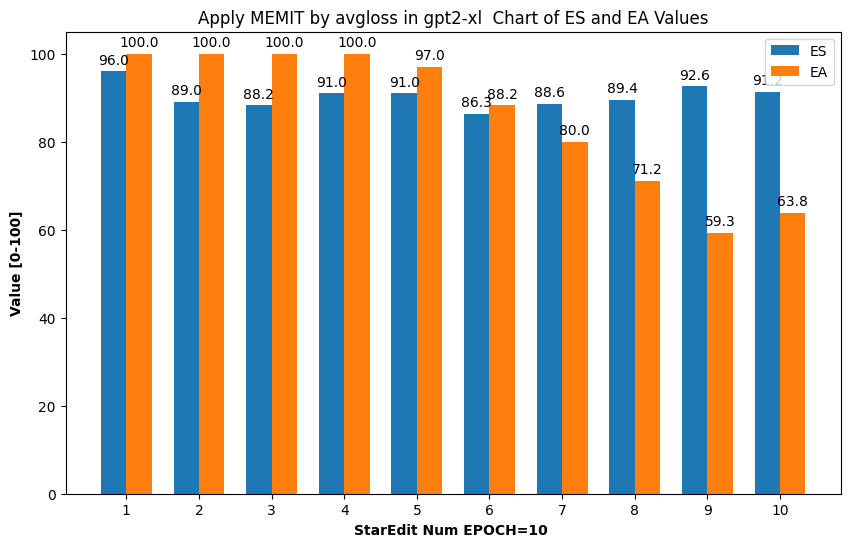

In [4]:
data = metrics_yago_1_10
# 调用函数绘制图表
plot_star_chart(data,Method="MEMIT",Model="gpt2-xl",EPOCH=10)
